In [15]:
import pandas as pd
import numpy as np



In [16]:
df=pd.read_csv('/content/penguins_size.csv')

In [17]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

###univariate analysis


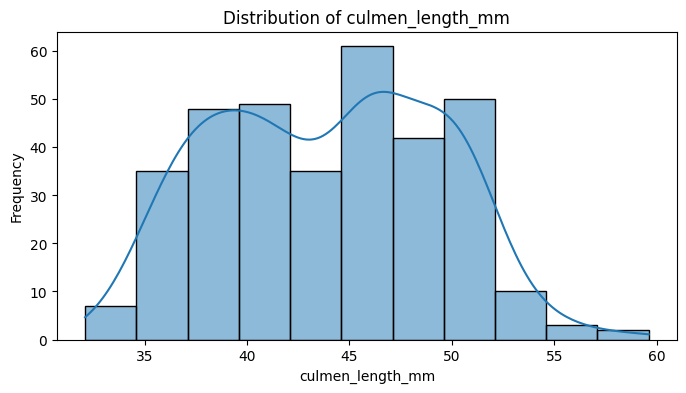

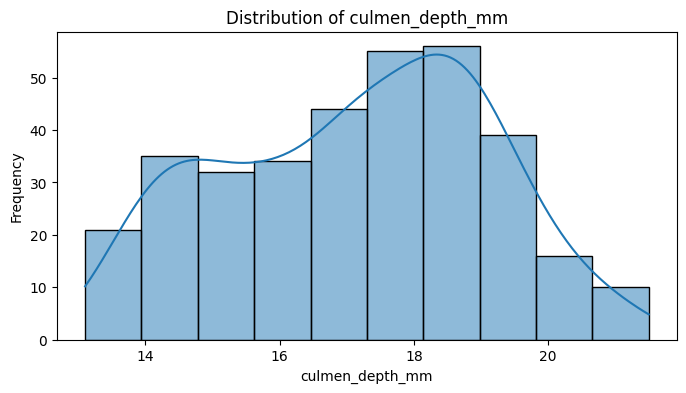

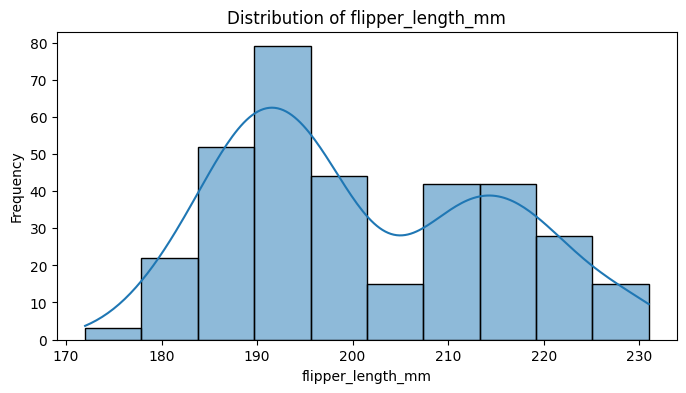

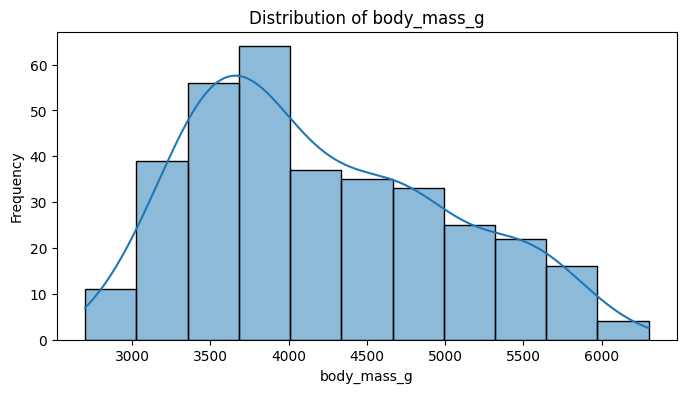

In [6]:
numerical_columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()







###multivariate analysis

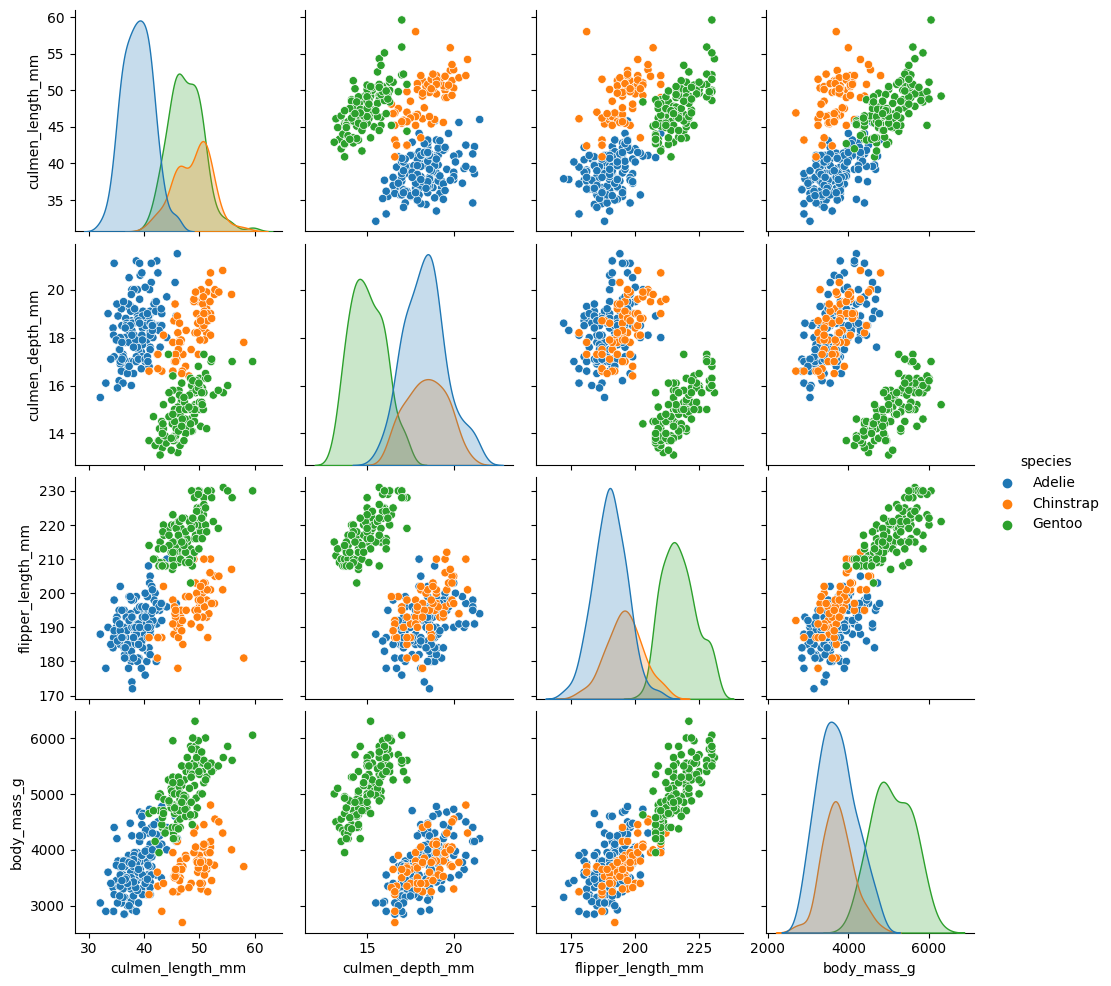

In [7]:
sns.pairplot(df.dropna(), hue="species")
plt.show()

###bivariate analysis


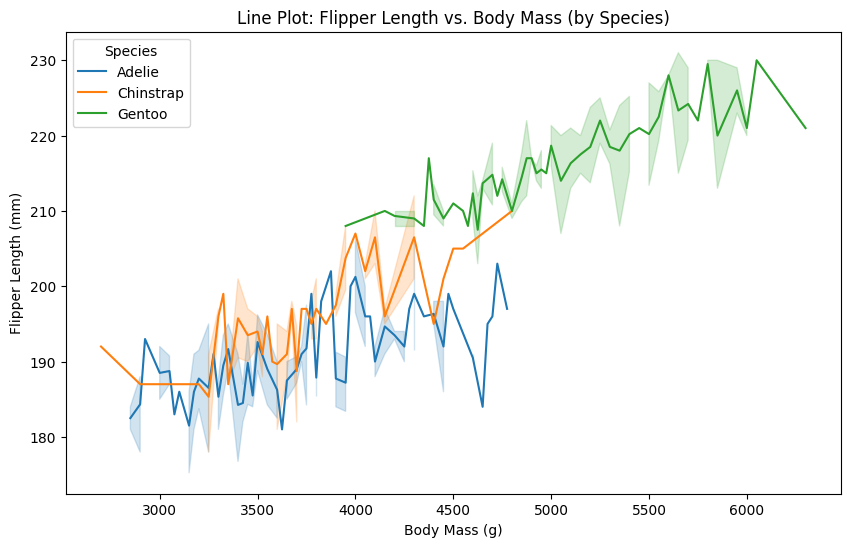

In [9]:
df_cleaned = df.dropna()

# Create a line plot to visualize the trend of flipper length over body mass for each species
plt.figure(figsize=(10, 6))

sns.lineplot(x="body_mass_g", y="flipper_length_mm", hue="species", data=df_cleaned)
plt.title("Line Plot: Flipper Length vs. Body Mass (by Species)")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")

plt.legend(title="Species", loc="best")
plt.show()

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [12]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [13]:
df['sex'].fillna('UNKNOWN', inplace=True)

In [14]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

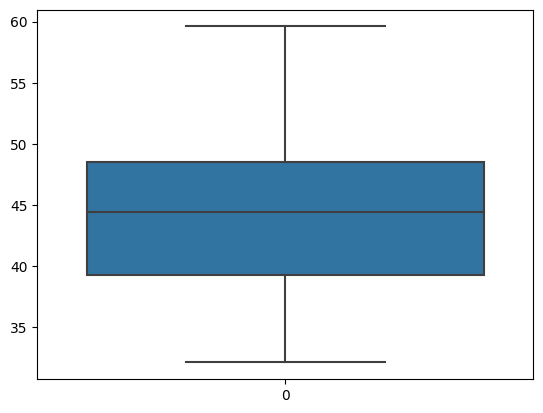

In [26]:
sns.boxplot(df.culmen_length_mm )

In [23]:
def replace_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[(column < lower_bound) | (column > upper_bound)] = np.nan

# Apply the function to the numeric columns
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[numeric_columns].apply(replace_outliers)

# Now, your DataFrame will have outliers replaced with NaN values
print(df)



    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

In [27]:
target_variable = 'body_mass_g'
independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
correlation_matrix = df[independent_variables + [target_variable]].corr()
correlation_with_target = correlation_matrix[target_variable]
print(correlation_with_target)

culmen_length_mm     0.595110
culmen_depth_mm     -0.471916
flipper_length_mm    0.871202
body_mass_g          1.000000
Name: body_mass_g, dtype: float64


In [28]:
categorical_columns = ['species', 'island', 'sex']

df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,0,1,0
3,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,0,1,0


In [29]:
target_variable = 'body_mass_g'
independent_variables = [col for col in df.columns if col != target_variable]
X = df[independent_variables]
y = df[target_variable]
X.head()
y.head()

0    3750.0
1    3800.0
2    3250.0
3       NaN
4    3450.0
Name: body_mass_g, dtype: float64

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [34]:
from sklearn.preprocessing import StandardScaler


target_variable = 'body_mass_g'
categorical_columns = ['species', 'island', 'sex']


categorical_data = df[categorical_columns]

df_numeric = df.drop(columns=categorical_columns + [target_variable])

scaler = StandardScaler()


X_scaled = scaler.fit_transform(df_numeric)

X_scaled_with_categorical = pd.concat([categorical_data, pd.DataFrame(X_scaled, columns=df_numeric.columns)], axis=1)


In [36]:
X_scaled_with_categorical

,species,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,Adelie,Torgersen,MALE,-0.884499,0.785449,-1.418347
1,Adelie,Torgersen,FEMALE,-0.811126,0.126188,-1.062250
2,Adelie,Torgersen,FEMALE,-0.664380,0.430462,-0.421277
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,FEMALE,-1.324737,1.089724,-0.563715
...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,FEMALE,0.527932,-1.445897,1.003109
341,Gentoo,Biscoe,MALE,1.188289,-0.735923,1.501644
342,Gentoo,Biscoe,FEMALE,0.234440,-1.192335,0.789451


In [37]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [38]:
X_train, X_test, y_train, y_test

(array([[-1.54485582, -0.48236102, -0.42127665],
        [ 0.52793167, -0.8880603 ,  1.00310906],
        [-0.86615549,  1.24186092, -0.42127665],
        [-0.68272297, -0.02594933, -0.56371522],
        [ 0.94982646, -1.09090994,  1.92895977],
        [ 1.26166175,  0.07547549,  1.92895977],
        [ 1.57349703, -0.78663548,  1.43042477],
        [-1.41645305, -0.53307343, -0.99103094],
        [-1.34308004,  0.633312  , -1.20468879],
        [-1.41645305,  0.07547549, -0.99103094],
        [ 0.01432061, -1.80088368,  0.50457406],
        [-1.50816931, -0.12737415, -1.13346951],
        [-0.07739565, -0.98948512,  0.86067049],
        [ 0.87645346, -1.04019753,  1.50164406],
        [-1.30639354,  0.68402441, -0.56371522],
        [ 0.76639394, -0.3809362 , -0.13639951],
        [ 0.47290191,  0.37974995, -0.63493451],
        [-0.26082817,  1.79969743, -0.27883808],
        [-0.9395285 ,  0.02476308, -1.48956593],
        [ 0.41787215, -1.34447199,  0.57579335],
        [-0.90284199

In [39]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (275, 3)
Shape of X_test: (69, 3)
Shape of y_train: (275,)
Shape of y_test: (69,)
